In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [52]:
# Load CSV file
df = pd.read_csv("figma_dataset.csv")

df = df[~df['tag'].str.contains(r'[-:]', regex=True)]
df = df[~df['tag'].str.contains(r'\b(CNX|ADDRESS|ASIDE|CANVAS|CITE|DD|DL|DT|ICON|S|VECTOR|DEL|LEGEND|BDI|LOGO|OBJECT|OPTGROUP|CENTER|CODE|BLOCKQUOTE|FRONT|Q|IFRAME|A|HR|SEARCH|DETAILS|FIELDSET|SLOT|SVG|AD|ADSLOT|AUDIO|BLINK|BOLD|COL|COLGROUP|COMMENTS|DATA|DIALOG|EMBED|EMPHASIS|FONT|H7|HGROUP|INS|INTERACTION|ITALIC|ITEMTEMPLATE|MARK|MATH|MENU|MI|MN|MO|MROW|MSUP|NOBR|OFFER|OPTION|PATH|PROGRESS|STRIKE|SWAL|TEXT|TFOOT|TITLE|TT|VAR|VEV|W|WBR|COUNTRY|ESI:INCLUDE|HTTPS:|LOGIN|NOCSRIPT|PERSONAL|STONG|CONTENT|DELIVERY|LEFT|MSUBSUP|KBD|ROOT|PARAGRAPH|BE|AI2SVELTEWRAP|BANNER|PHOTO1)\b', regex=True)]

# Define the regex pattern for matching
pattern = r'[-:]|\b(CNX|ADDRESS|ASIDE|CANVAS|CITE|DD|DL|DT|ICON|S|VECTOR|DEL|LEGEND|BDI|LOGO|OBJECT|OPTGROUP|CENTER|CODE|BLOCKQUOTE|FRONT|Q|IFRAME|SEARCH|DETAILS|FIELDSET|SLOT|AD|ADSLOT|AUDIO|BLINK|BOLD|COL|COLGROUP|COMMENTS|DATA|DIALOG|EMBED|EMPHASIS|FONT|H7|HGROUP|INS|INTERACTION|ITALIC|ITEMTEMPLATE|MARK|MATH|MENU|MI|MN|MO|MROW|MSUP|NOBR|OFFER|OPTION|PATH|PROGRESS|STRIKE|SWAL|TEXT|TFOOT|TITLE|TT|VAR|VEV|W|WBR|COUNTRY|ESI:INCLUDE|HTTPS:|LOGIN|NOCSRIPT|PERSONAL|STONG|CONTENT|DELIVERY|LEFT|MSUBSUP|KBD|ROOT|PARAGRAPH|BE|AI2SVELTEWRAP|BANNER|PHOTO1)\b'

# Apply the replacement conditionally
for col in ['prev_sibling_html_tag', 'child_1_html_tag', 'child_2_html_tag']:
    df[col] = np.where(df[col].str.contains(pattern, regex=True, na=False), 'DIV', df[col])

# Define mapping for tag replacements
tag_mapping = {
    "ARTICLE": "DIV", "DIV": "DIV", "FIGURE": "DIV", "FOOTER": "DIV", "HEADER": "DIV", "NAV": "DIV", "MAIN": "DIV",
    "BODY" : "DIV", "FORM" : "DIV", "OL" : "DIV", "UL" : "DIV", "TABLE": "DIV", "THEAD":"DIV" , "TBODY": "DIV", "SECTION" : "DIV",
    "H1": "P", "H2": "P", "H3": "P", "H4": "P", "H5": "P", "H6": "P","SUP": "P","SUB": "P", "BIG": "P",
    "P": "P", "CAPTION": "P", "FIGCAPTION": "P", "B": "P", "EM": "P", "I": "P", "TD": "P", "TH": "P", "TR": "P","PRE":"P",
    "U": "P", "TIME": "P", "TXT": "P", "ABBR": "P","SMALL": "P","STRONG": "P","SUMMARY": "P","SPAN": "P", "LABEL": "P","LI":"P",
    "PICTURE": "IMG" , "VIDEO": "IMG",
    "SELECT": "INPUT","TEXTAREA": "INPUT",
    "VECTOR": "SVG"
}

# df.loc[(df["tag"] == "LABEL") & ((df["type"] == "RECTANGLE") | (df["type"] == "GROUP")), "tag"] = "DIV"
df.loc[(df["tag"] == "SPAN") & ((df["type"] == "RECTANGLE") | (df["type"] == "GROUP")), "tag"] = "DIV"

# Replace any value in children tag columns that contains '-' with 'DIV'
children_cols = ['child_1_html_tag', 'child_2_html_tag']
for col in children_cols:
    df[col] = df[col].apply(lambda x: "DIV" if isinstance(x, str) and '-' in x else x)

# Convert tag and parent_tag_html columns to uppercase
df['tag'] = df['tag'].str.upper()
df['prev_sibling_html_tag'] = df['prev_sibling_html_tag'].str.upper()
df['child_1_html_tag'] = df['child_1_html_tag'].str.upper()
df['child_2_html_tag'] = df['child_2_html_tag'].str.upper()

# Apply mapping to 'tag' and 'parent_tag_html' columns
df['tag'] = df['tag'].replace(tag_mapping)
df['prev_sibling_html_tag'] = df['prev_sibling_html_tag'].replace(tag_mapping)
df['child_1_html_tag'] = df['child_1_html_tag'].replace(tag_mapping)
df['child_2_html_tag'] = df['child_2_html_tag'].replace(tag_mapping)



df = df[~df['tag'].str.contains(r'\b(P|IMG|CHECKBOX|RADIO)\b', regex=True)]

# Print remaining unique tags
print(df['tag'].unique())

C:\Users\AOZ\AppData\Local\Temp\ipykernel_3680\1073807062.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[~df['tag'].str.contains(r'\b(CNX|ADDRESS|ASIDE|CANVAS|CITE|DD|DL|DT|ICON|S|VECTOR|DEL|LEGEND|BDI|LOGO|OBJECT|OPTGROUP|CENTER|CODE|BLOCKQUOTE|FRONT|Q|IFRAME|A|HR|SEARCH|DETAILS|FIELDSET|SLOT|SVG|AD|ADSLOT|AUDIO|BLINK|BOLD|COL|COLGROUP|COMMENTS|DATA|DIALOG|EMBED|EMPHASIS|FONT|H7|HGROUP|INS|INTERACTION|ITALIC|ITEMTEMPLATE|MARK|MATH|MENU|MI|MN|MO|MROW|MSUP|NOBR|OFFER|OPTION|PATH|PROGRESS|STRIKE|SWAL|TEXT|TFOOT|TITLE|TT|VAR|VEV|W|WBR|COUNTRY|ESI:INCLUDE|HTTPS:|LOGIN|NOCSRIPT|PERSONAL|STONG|CONTENT|DELIVERY|LEFT|MSUBSUP|KBD|ROOT|PARAGRAPH|BE|AI2SVELTEWRAP|BANNER|PHOTO1)\b', regex=True)]
C:\Users\AOZ\AppData\Local\Temp\ipykernel_3680\1073807062.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[co

['DIV' 'BUTTON' 'INPUT']


In [53]:
label_column = "tag"
features = df.columns.difference([label_column])

In [54]:
# Convert non-numeric values to numeric using one-hot encoding or factorization
df_encoded = df.copy()
for col in features:
    if df[col].dtype == 'object':
        df_encoded[col], _ = pd.factorize(df[col])

In [55]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded[features])

In [56]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# for feature in features:  
#     sns.histplot(data=df_encoded, x=feature, hue="tag", bins=50, kde=True)
#     plt.show()

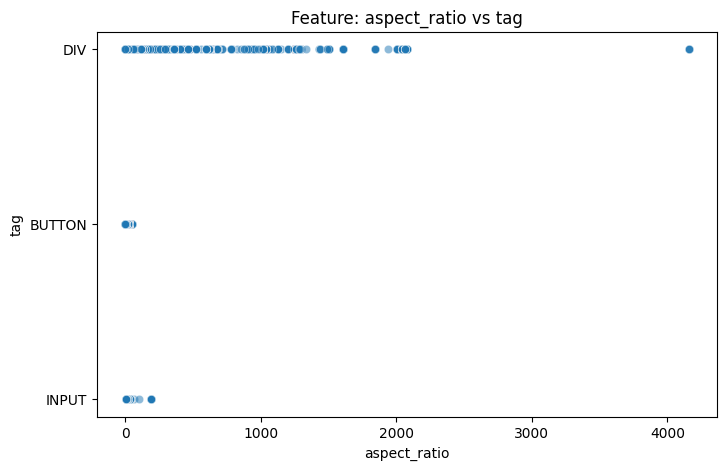

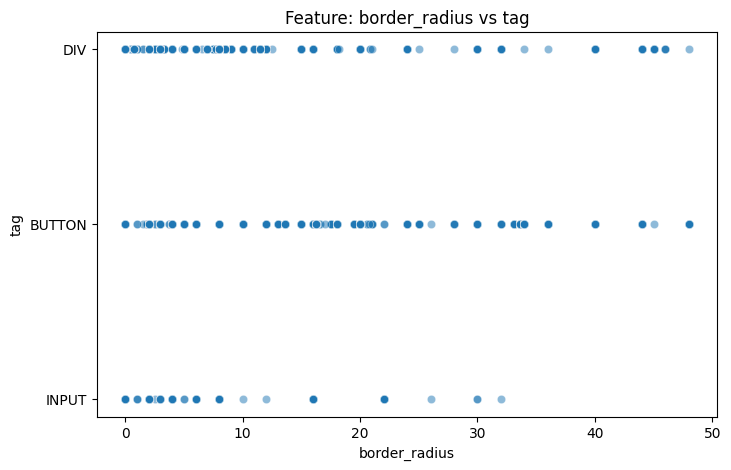

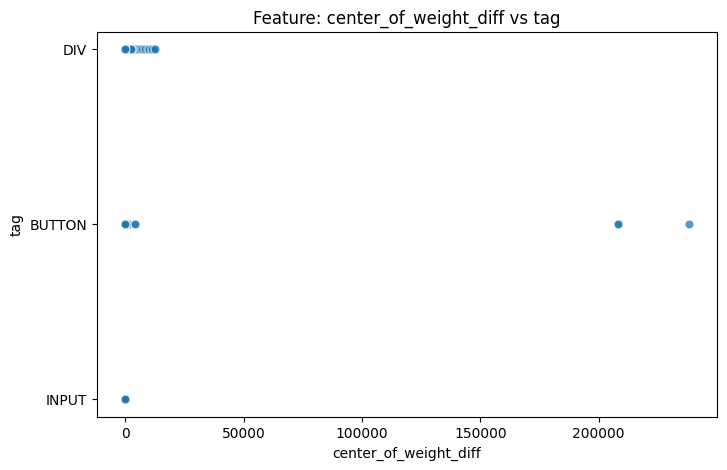

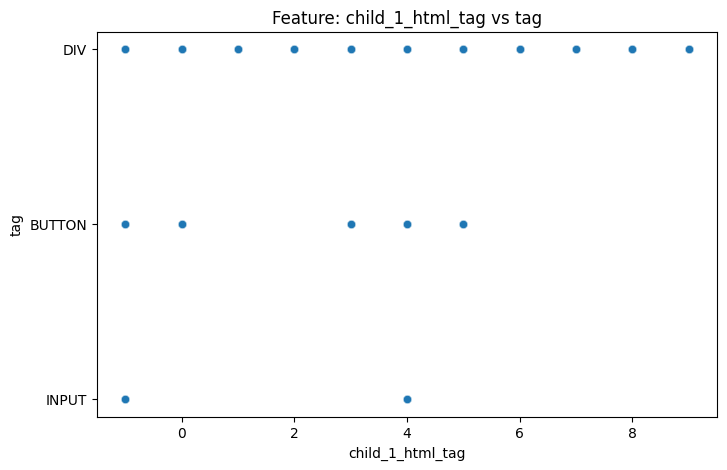

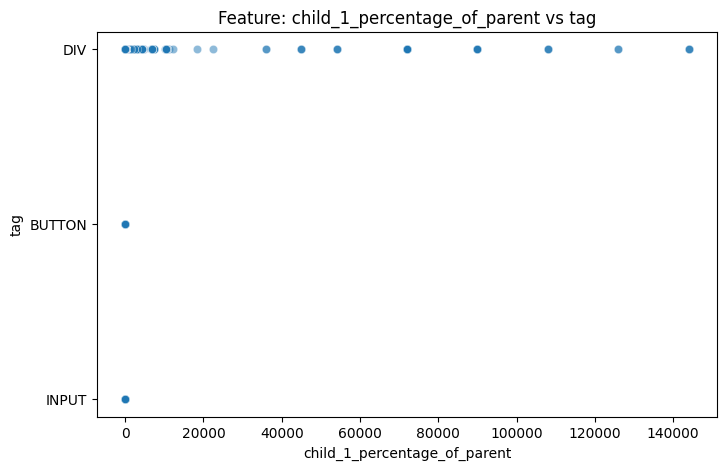

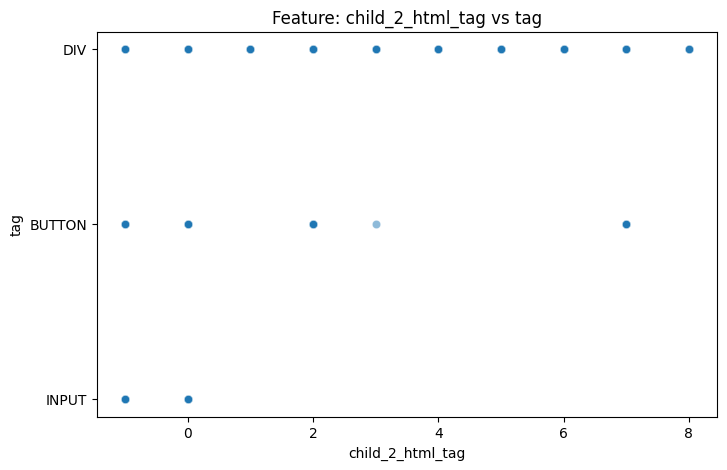

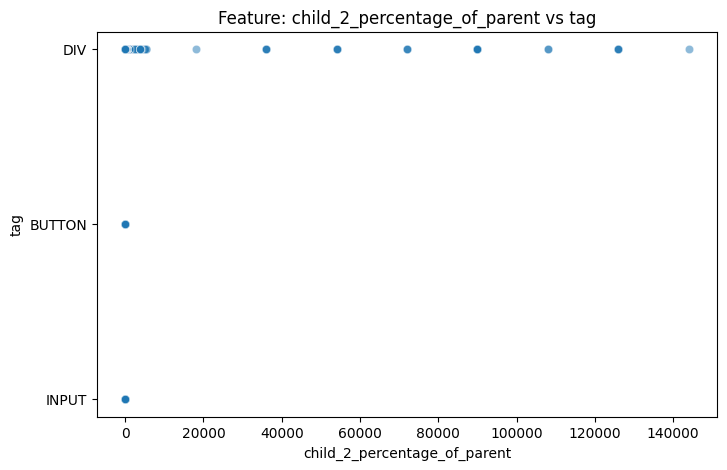

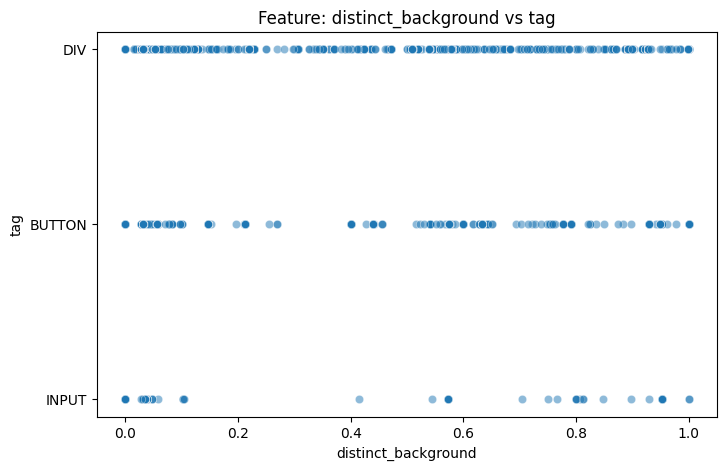

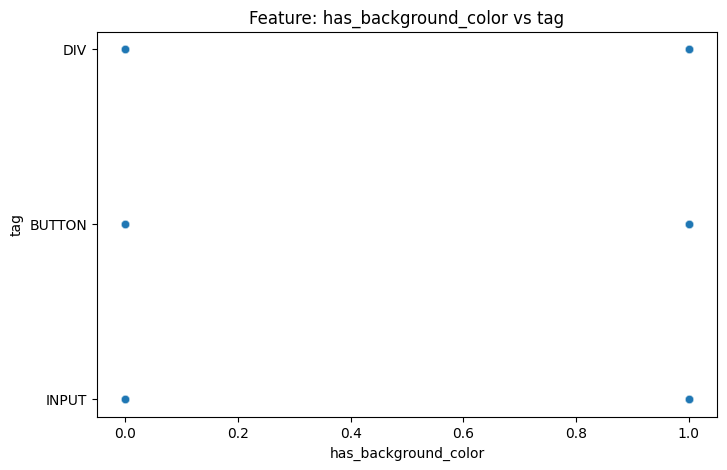

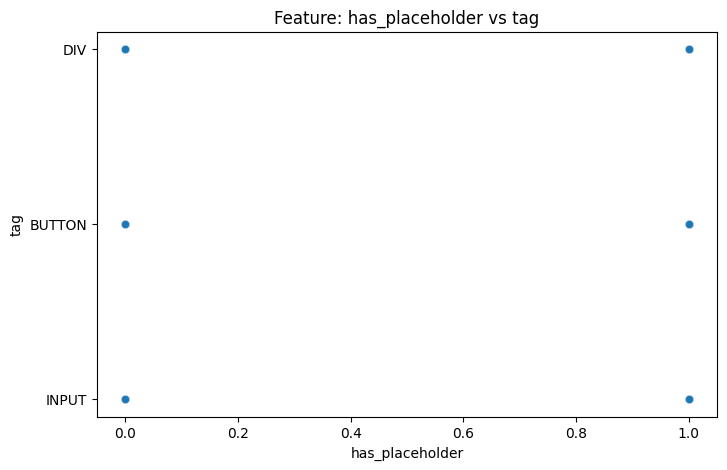

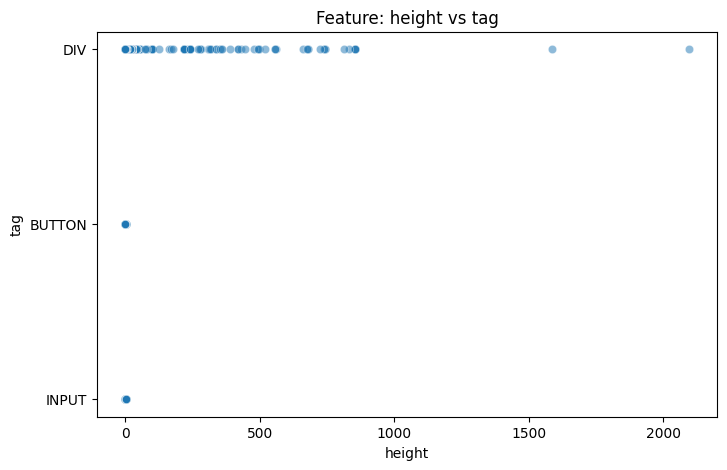

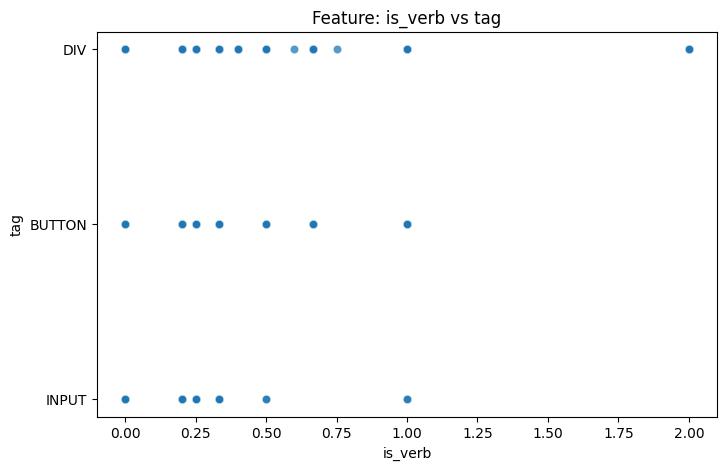

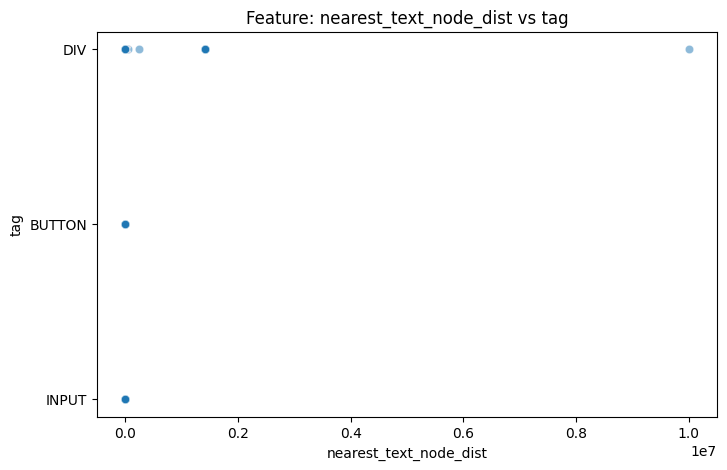

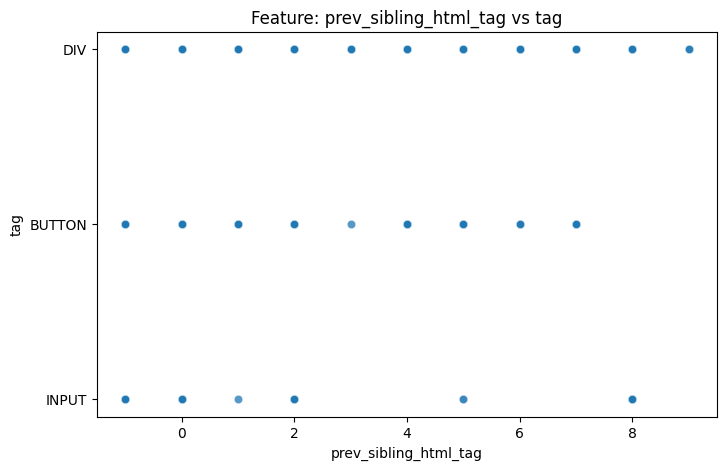

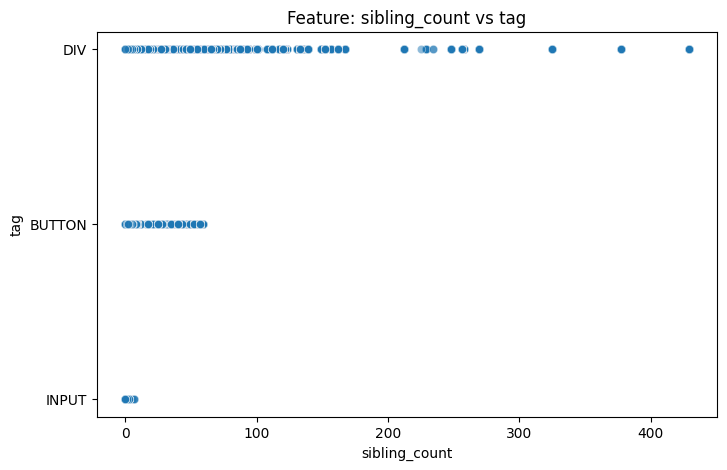

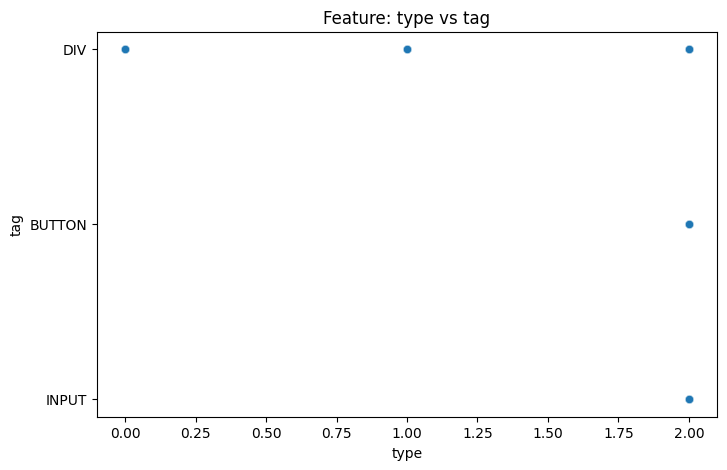

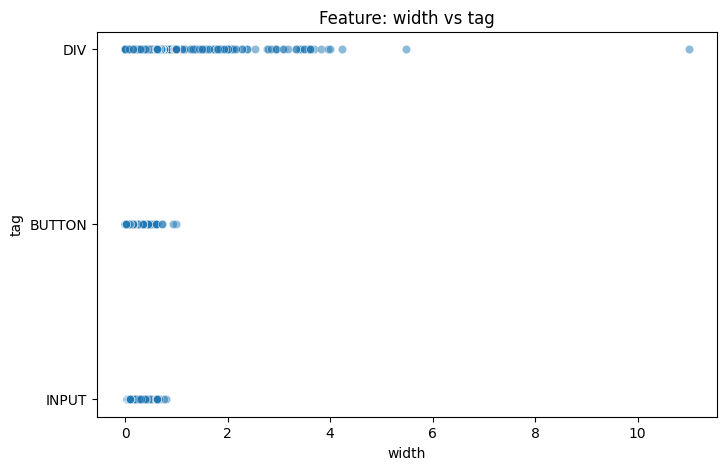

In [57]:
# Plot scatter plot for each feature against the tag
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df_encoded[feature], y=df_encoded[label_column], alpha=0.5)
    plt.title(f"Feature: {feature} vs {label_column}")
    plt.xlabel(feature)
    plt.ylabel(label_column)
    plt.show()

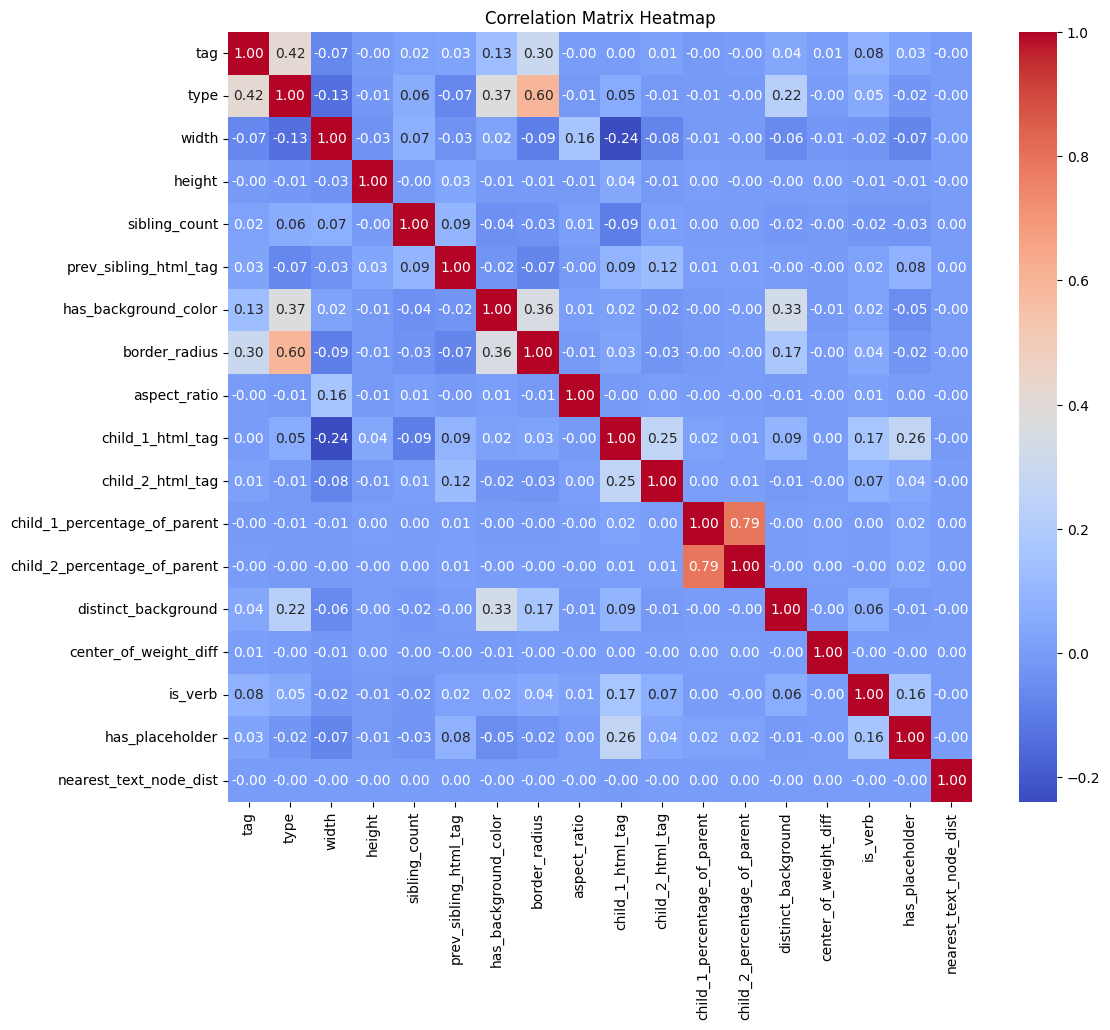

In [58]:
# Fill any remaining NaN values with 0
df = df.fillna(0)

# Convert non-numeric values to numeric using one-hot encoding or factorization
df_encoded = df.copy()
for col in df.columns:
    if df[col].dtype == 'object':
        df_encoded[col], _ = pd.factorize(df[col])

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()
